In [1]:
# Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Loading dataset
odd = pd.read_csv('data/diff_view.csv', sep=',')

In [3]:
odd.head()

,hda_result,str_macau_h_diff,str_macau_d_diff,str_macau_a_diff,str_hkjc_h_diff,str_hkjc_d_diff,str_hkjc_a_diff,end_macau_h_diff,end_macau_d_diff,end_macau_a_diff,end_hkjc_h_diff,end_hkjc_d_diff,end_hkjc_a_diff,str_hilo_handicap,str_hilo_fav,end_hilo_handicap,end_hilo_fav
0,A,-0.0145,-0.0040,-0.0632,0.2319,-0.0475,-0.2382,0.3289,-0.0135,-0.4918,0.3289,-0.0295,-0.5173,2.00,1,2.5,1
1,A,-0.0308,0.0031,-0.0446,-0.1746,0.0266,0.3039,-0.2051,0.1030,0.1898,-0.2301,0.0634,0.2325,2.25,0,2.5,1
2,A,0.0043,0.0052,-0.0855,0.0277,-0.0709,-0.0947,0.0040,-0.0262,-0.0654,0.0256,-0.1368,-0.0341,2.50,1,2.5,1
3,A,-0.0142,-0.0032,-0.0504,-0.1004,-0.0446,0.0388,0.1162,-0.0296,-0.1751,0.2238,-0.0953,-0.2442,2.25,0,2.5,1
4,A,0.0129,-0.0070,-0.0798,0.0713,-0.0470,-0.1608,-0.0813,0.0695,-0.0138,-0.0813,0.0132,-0.0138,2.25,1,2.5,1


In [4]:
# odd.info()

In [5]:
# Check null
# odd.isnull().sum()

In [6]:
# Preprocessing data
# bins = (2, 0, 1)
# group_names = ['hi','lo']
# odd['RESULT'] = 
# pd.cut([0, 1], bins = 2, labels = group_names)
# odd['RESULT'] = pd.cut(odd['RESULT'], bins = 2, labels = group_names)
# odd['RESULT'].unique()

In [7]:
odd['hda_result'].value_counts()

A    207
H    118
Name: hda_result, dtype: int64

<AxesSubplot:xlabel='hda_result', ylabel='count'>

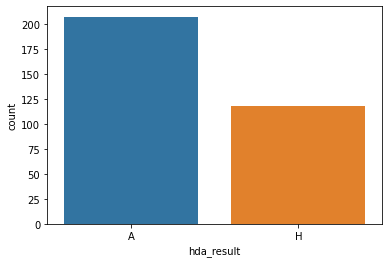

In [8]:
sns.countplot(odd['hda_result'])

In [9]:
# Now seperate the dataset as response variable and feature variables
X = odd.drop('hda_result', axis=1)
y = odd['hda_result']

In [10]:
# Train and test splitting of data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
# Applying standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# X_train[:10]

# Random Forest Classifier

In [13]:
rfc = RandomForestClassifier(n_estimators=800)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [14]:
# 
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           A       0.58      0.86      0.70        36
           H       0.58      0.24      0.34        29

    accuracy                           0.58        65
   macro avg       0.58      0.55      0.52        65
weighted avg       0.58      0.58      0.54        65

[[31  5]
 [22  7]]


In [15]:
print('score=', accuracy_score(y_test, pred_rfc))

score= 0.5846153846153846


# SVM Classifier

In [16]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [17]:
# 
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           A       0.55      0.97      0.70        36
           H       0.00      0.00      0.00        29

    accuracy                           0.54        65
   macro avg       0.27      0.49      0.35        65
weighted avg       0.30      0.54      0.39        65

[[35  1]
 [29  0]]


In [18]:
print('score=', accuracy_score(y_test, pred_clf))

score= 0.5384615384615384


# Neural Network

In [19]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=800)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

C:\Users\willi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           A       0.57      0.69      0.62        36
           H       0.48      0.34      0.40        29

    accuracy                           0.54        65
   macro avg       0.52      0.52      0.51        65
weighted avg       0.53      0.54      0.52        65

[[25 11]
 [19 10]]


In [21]:
print('score=', accuracy_score(y_test, pred_mlpc))

score= 0.5384615384615384


In [22]:
# # 瑞典超 奧雷布洛 馬模 1 1 (AAH)
# Xnew = [[0,5.7371,5.5,4.32,4.3,1.4671,1.465,5.35,4.35,1.43,6.7,4.5,1.33,0,7.7179,7.675,5.2093,5.275,1.35,1.355,6.3,5,1.32,6.7,4.6,1.32,3,.93,.77,3.5,1.33,.53,4.5,.7,.95,3.5,1.15,.62,11,-1,1.0027,1.01,-1,1.06,.74,12,-1.5,.9208,.92,-1.5,.84,.96]]
# # 智利甲 奧達斯 塞雷那 2 1 0 0 上盤 H (AAH)
# Xnew = [[1,1.8529,1.84,3.5921,3.625,3.6607,3.735,1.88,3.48,3.28,1.92,3.45,3.2,1,2.1843,2.2,3.4236,3.465,2.9564,3,1.94,3.48,3.05,2.1,3.4,2.85,2.75,.87,.73,2.5,.68,1.05,3.5,1.15,.4,2.5,.72,1,9,.5,.8956,.9,.5,.9,.8,12,.25,.9767,.98,.5,1,.7]]
# # 墨西聯春 拿根亞 普馬斯 1 2 0 1 A (A)
# Xnew = [[1,1.86,1.865,3.5929,3.575,3.7929,3.7,1.87,3.6,3.35,1.9,3.4,3.3,1,2.0514,2.09,3.4571,3.475,3.3236,3.2,1.95,3.6,3.12,1.9,3.4,3.3,2.75,.95,.75,2.5,.68,1.05,3.5,1.35,.3,2.5,.68,1.05,12,.5,.8817,.87,.5,.92,.88,11,.5,1.07,1.09,.5,1,.8]]
# # 巴西甲 山度士 明尼路 3 1 2 1 主 H (A)
# Xnew = [[0,2.9107,2.99,3.235,3.225,2.3386,2.28,2.98,3.41,2.07,3.4,3.35,1.88,0,4.1543,4.25,3.8707,3.9,1.7636,1.755,4.1,3.5,1.72,3.75,3.5,1.75,2.25,.7,1,2.5,.83,.87,2.75,.8,.9,2.5,.65,1.1,7,0,.9657,.87,-.25,.94,.86,11,-.75,.8755,.88,-.5,1.04,.76]]
# # 巴西甲 富明尼斯 法林明高 1 2 0 2 A (A)
# Xnew = [[0,4.4979,4.525,3.4043,3.4,1.7436,1.745,4,3.5,1.74,4.65,3.4,1.63,0,5.4164,5.5,3.7093,3.75,1.6257,1.64,5.3,3.6,1.55,5,3.55,1.56,2.25,.9,.8,2.5,1.02,.7,2.25,.9,.8,2.5,1,.72,13,-.75,.8762,.87,-.75,.81,.99,13,-.75,1.0238,1.02,-.75,1.02,.78]]
# # 法甲 朗斯 巴黎聖日門 (AAH)
# Xnew = [[0,8.7536,8.875,6.195,6.3,1.2693,1.245,7.55,6.3,1.23,4.3,3.4,1.68,0,4.8171,4.8,3.76,3.85,1.6914,1.71,4.85,3.55,1.6,4.75,3.5,1.59,3.75,.93,.77,2.5,.9,.8,2.5,.85,.85,2.5,.85,.85,7,-2,.8057,.83,-2,.72,1.08,14,-.75,.9443,.94,-.75,.94,.86]]
# # 智利甲 高路高路 奧希金斯 0 1 0 1 A (HAH)
Xnew = [[1,1.62,1.615,3.89,3.9,4.62,4.625,1.65,3.65,4.05,1.69,3.55,4,1,2.2764,2.26,3.3179,3.35,2.88,2.83,2.15,3.35,2.75,2.15,3.3,2.8,2.75,.74,.86,2.5,.75,.95,1.5,1.2,.35,2.5,.8,.9,10,.75,.875,.875,.75,.85,.85,14,.25,1.04,1.055,.25,.92,.78]]

Xnew = sc.transform(Xnew)

ynew = rfc.predict(Xnew)
print('rfc: ', ynew)
ynew = clf.predict(Xnew)
print('svm: ', ynew)
ynew = mlpc.predict(Xnew)
print('mlpc: ', ynew)

ValueError: X has 52 features, but this StandardScaler is expecting 16 features as input.